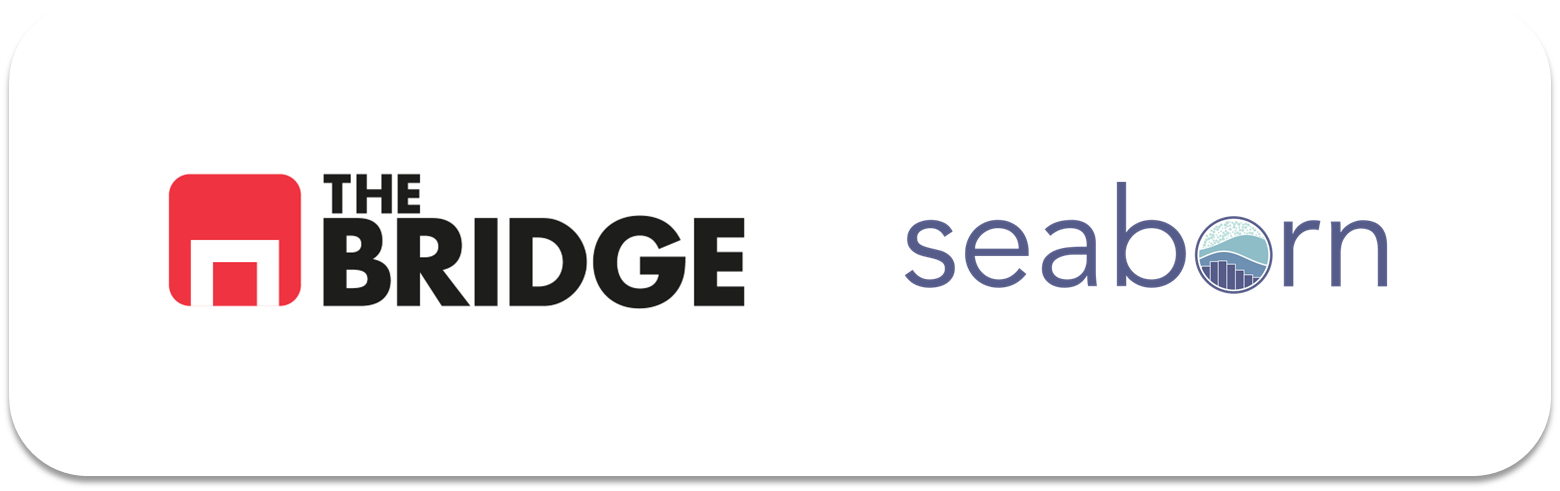

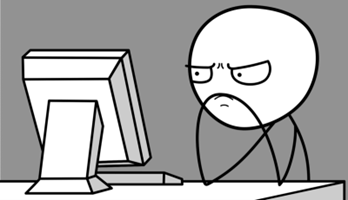

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [3]:

def analizar_categoricas(df, col1, col2, figsize=(15, 5)):
    """
    Realiza un análisis visual y estadístico de dos variables categóricas.
    
    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene los datos
    col1 (str): Nombre de la primera columna categórica
    col2 (str): Nombre de la segunda columna categórica
    figsize (tuple): Tamaño de la figura (ancho, alto)
    
    Retorna:
    pandas.DataFrame: Tabla de contingencia entre las dos variables
    """
    # Configuración del estilo de seaborn
    sns.set_style("whitegrid")
    
    # Crear la figura principal con dos subplots para los countplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Gráfico de frecuencias para la primera variable
    sns.countplot(data=df, x=col1, ax=ax1)
    ax1.set_title(f'Frecuencias de {col1}')
    ax1.tick_params(axis='x', rotation=45)  # Rotar etiquetas si son largas
    
    # Gráfico de frecuencias para la segunda variable
    sns.countplot(data=df, x=col2, ax=ax2)
    ax2.set_title(f'Frecuencias de {col2}')
    ax2.tick_params(axis='x', rotation=45)  # Rotar etiquetas si son largas
    
    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    
    # Mostrar la primera figura
    plt.show()
    
    # Crear una nueva figura para el catplot
    plt.figure(figsize=figsize)
    
    # Crear el catplot
    sns.catplot(
        data=df,
        x=col1,
        col=col2,
        kind="count",
        height=figsize[1],
        aspect=figsize[0]/(2*figsize[1])
    )
    
    # Ajustar el título y rotación de etiquetas
    plt.suptitle(f'Distribución de {col1} por categorías de {col2}', y=1.05)
    for ax in plt.gcf().axes:
        ax.tick_params(axis='x', rotation=45)
    
    # Mostrar la segunda figura
    plt.show()
    
    # Crear y retornar la tabla de contingencia
    tabla_contingencia = pd.crosstab(df[col1], df[col2])
    
    return tabla_contingencia

### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

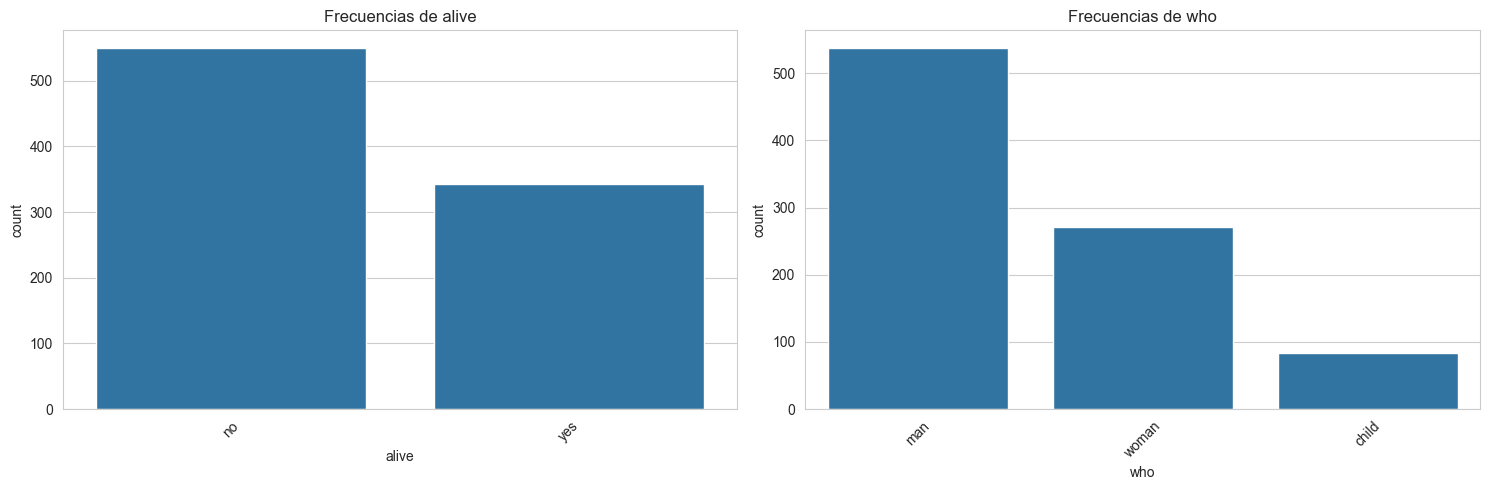

<Figure size 1500x500 with 0 Axes>

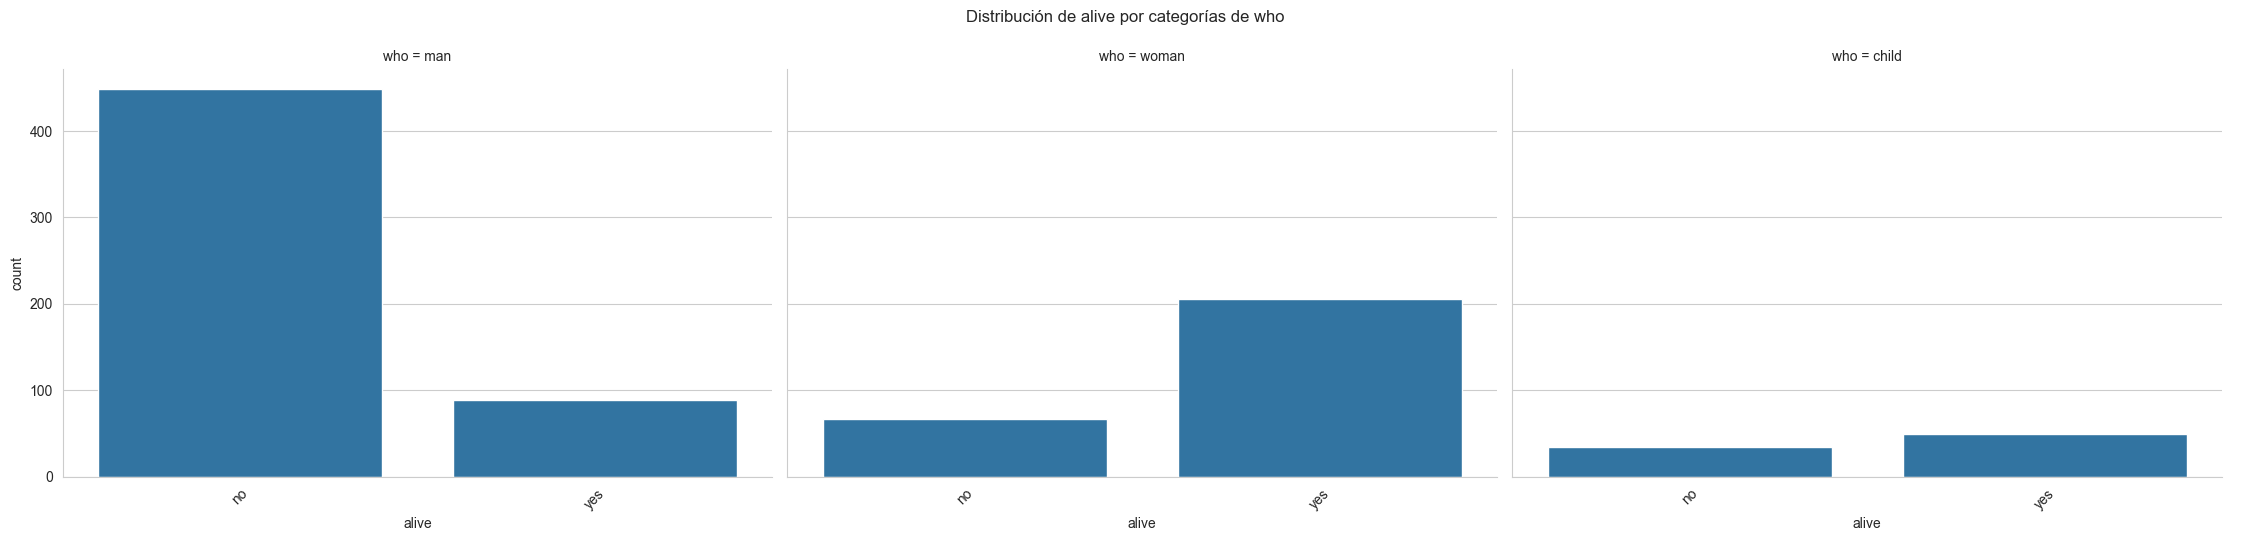


Tabla de contingencia:
who    child  man  woman
alive                   
no        34  449     66
yes       49   88    205


In [5]:
a_w = analizar_categoricas(df_titanic, 'alive', 'who')
print("\nTabla de contingencia:")
print(a_w)

#### Alive y Class

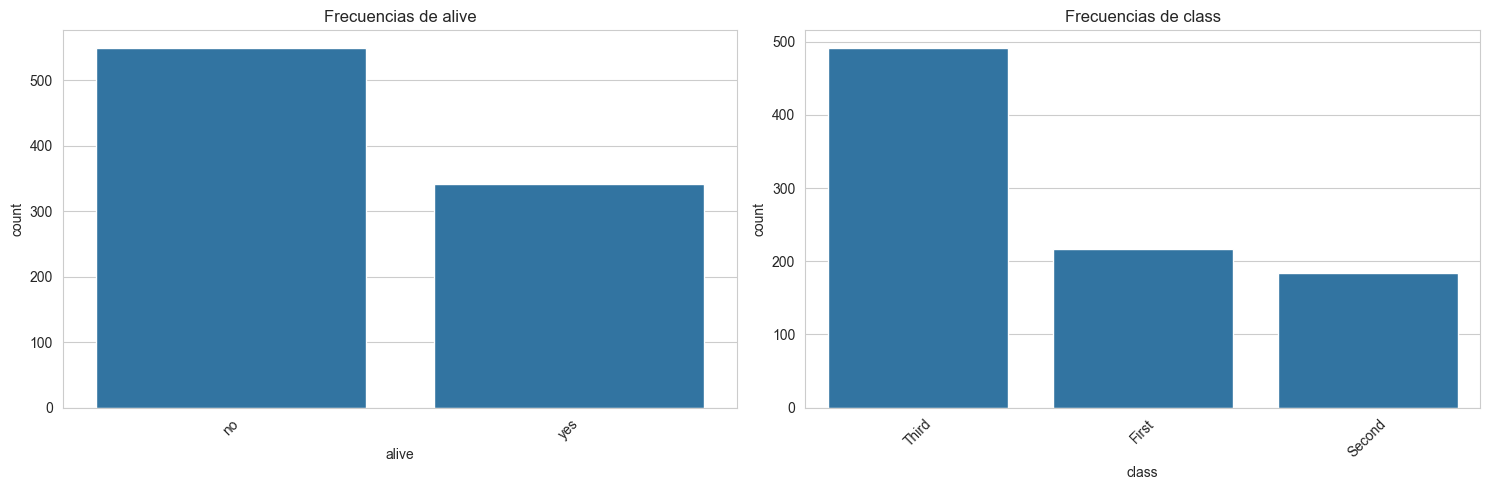

<Figure size 1500x500 with 0 Axes>

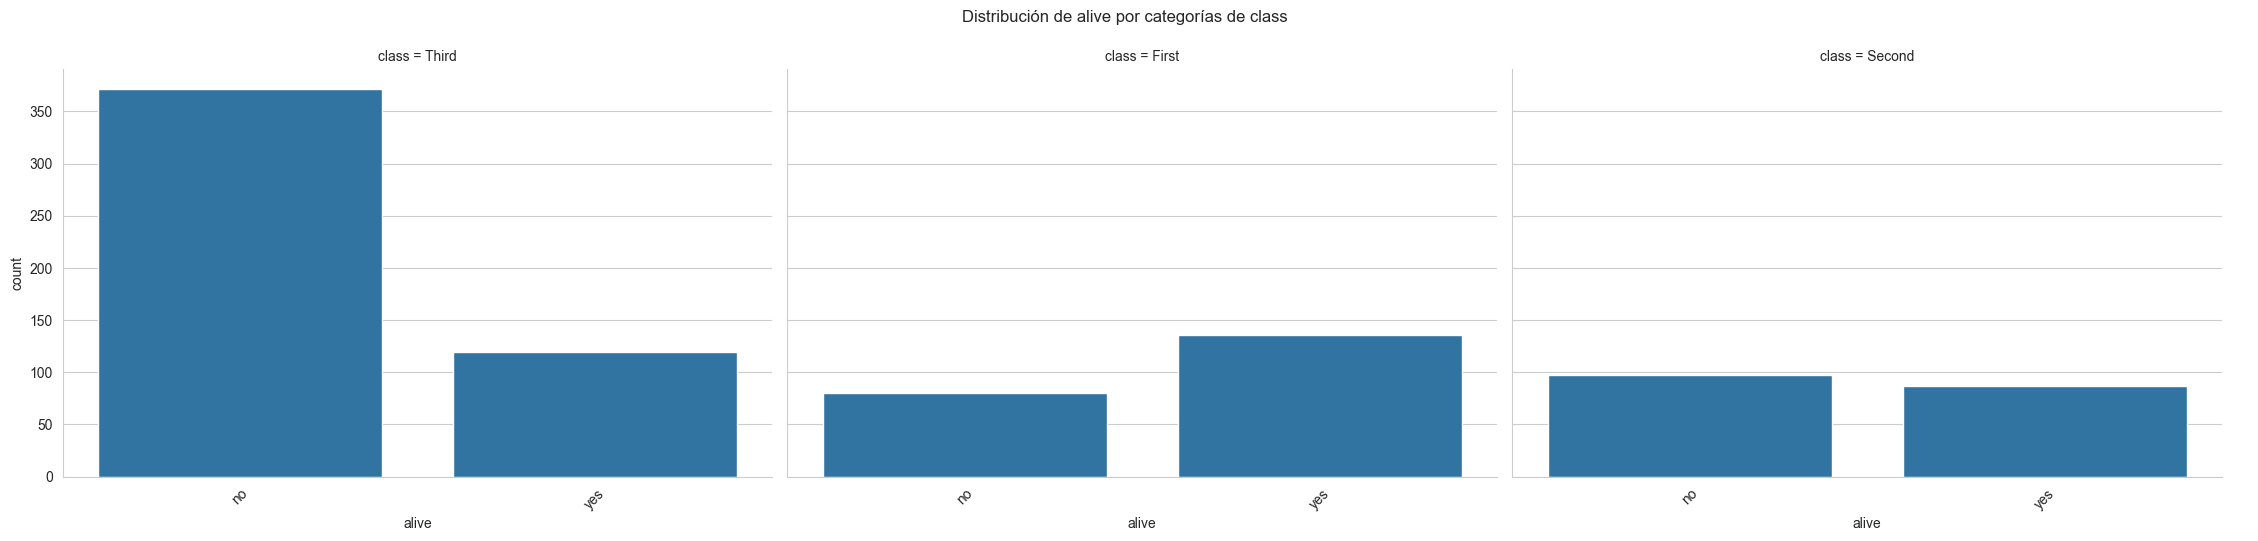


Tabla de contingencia:
class  First  Second  Third
alive                      
no        80      97    372
yes      136      87    119


In [6]:
a_c = analizar_categoricas(df_titanic, 'alive', 'class')
print("\nTabla de contingencia:")
print(a_c)

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [13]:
from math import ceil  # Importamos específicamente la función ceil

def analizar_cat_num(df, col_cat, col_num, figsize=(15, 10)):
    """
    Crea una matriz de histogramas que muestra la distribución de una variable numérica
    para cada valor único de una variable categórica.
    
    Parámetros:
    df (pandas.DataFrame): DataFrame que contiene los datos
    col_cat (str): Nombre de la columna categórica
    col_num (str): Nombre de la columna numérica
    figsize (tuple): Tamaño base de la figura (ancho, alto)
    """
    # Obtener valores únicos de la variable categórica
    valores_unicos = df[col_cat].unique()
    n_categorias = len(valores_unicos)
    
    # Calcular número de filas y columnas para los subplots
    n_cols = min(3, n_categorias)  # Máximo 3 columnas
    n_rows = ceil(n_categorias / n_cols)  # Calcular filas necesarias usando ceil
    
    # Ajustar el tamaño de la figura según el número de subplots
    fig_height = figsize[1] * n_rows / 2  # Ajuste proporcional de la altura
    fig = plt.figure(figsize=(figsize[0], fig_height))
    
    # Configurar el estilo de seaborn
    sns.set_style("whitegrid")
    
    # Crear los subplots
    for idx, valor in enumerate(valores_unicos, 1):
        # Crear subplot
        ax = plt.subplot(n_rows, n_cols, idx)
        
        # Filtrar datos para el valor actual de la categórica
        datos_filtrados = df[df[col_cat] == valor][col_num]
        
        # Crear histograma
        sns.histplot(
            data=datos_filtrados,
            bins='auto',  # Número de bins automático
            kde=True,     # Añadir curva de densidad
            ax=ax
        )
        
        # Configurar título y etiquetas
        ax.set_title(f'Histograma de {col_num}\npara {col_cat}={valor}')
        ax.set_xlabel(col_num)
        ax.set_ylabel('Frecuencia')
        
        # Ajustar las etiquetas del eje x para mejor legibilidad
        ax.tick_params(axis='x', rotation=45)
    
    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    
    # Mostrar la figura
    plt.show()
    
    # Opcional: retornar estadísticas descriptivas por categoría
    return df.groupby(col_cat)[col_num].describe()

### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

In [11]:
df_viajes.head(5)

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


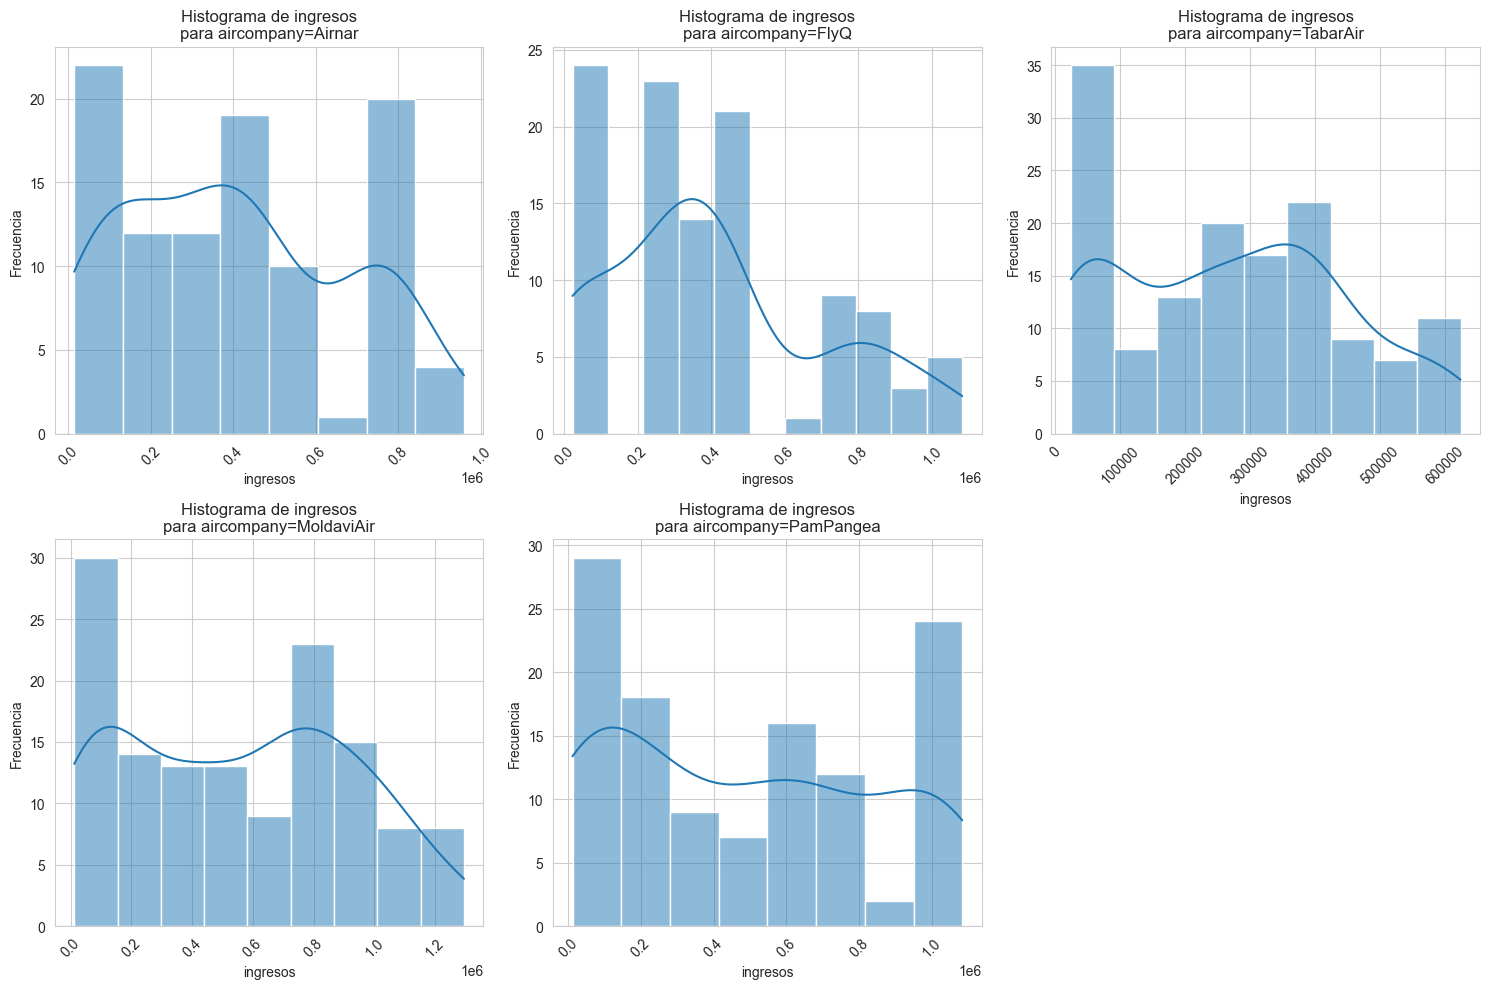


Estadísticas descriptivas por categoría:


,count,mean,std,min,25%,50%,75%,max
aircompany,,,,,,,,
Airnar,100.0,405293.978200,269583.848420,14232.65,185270.6000,396764.220,608356.1225,958617.02
FlyQ,108.0,401619.008056,295633.712828,23498.34,237556.9525,366970.685,473901.4325,1081702.91
MoldaviAir,133.0,548077.209098,374577.838426,11797.85,178872.9000,532426.220,794055.4100,1295515.83
PamPangea,117.0,478417.048718,364458.092328,12383.21,163124.5300,442668.520,763079.0200,1083591.01
TabarAir,142.0,271042.230282,177006.035877,24289.53,95620.5075,258379.745,398147.1925,623089.41


In [15]:
estadisticas = analizar_cat_num(df_viajes, 'aircompany', 'ingresos')
print("\nEstadísticas descriptivas por categoría:")
estadisticas

#### Aircompany y Consumo_kg

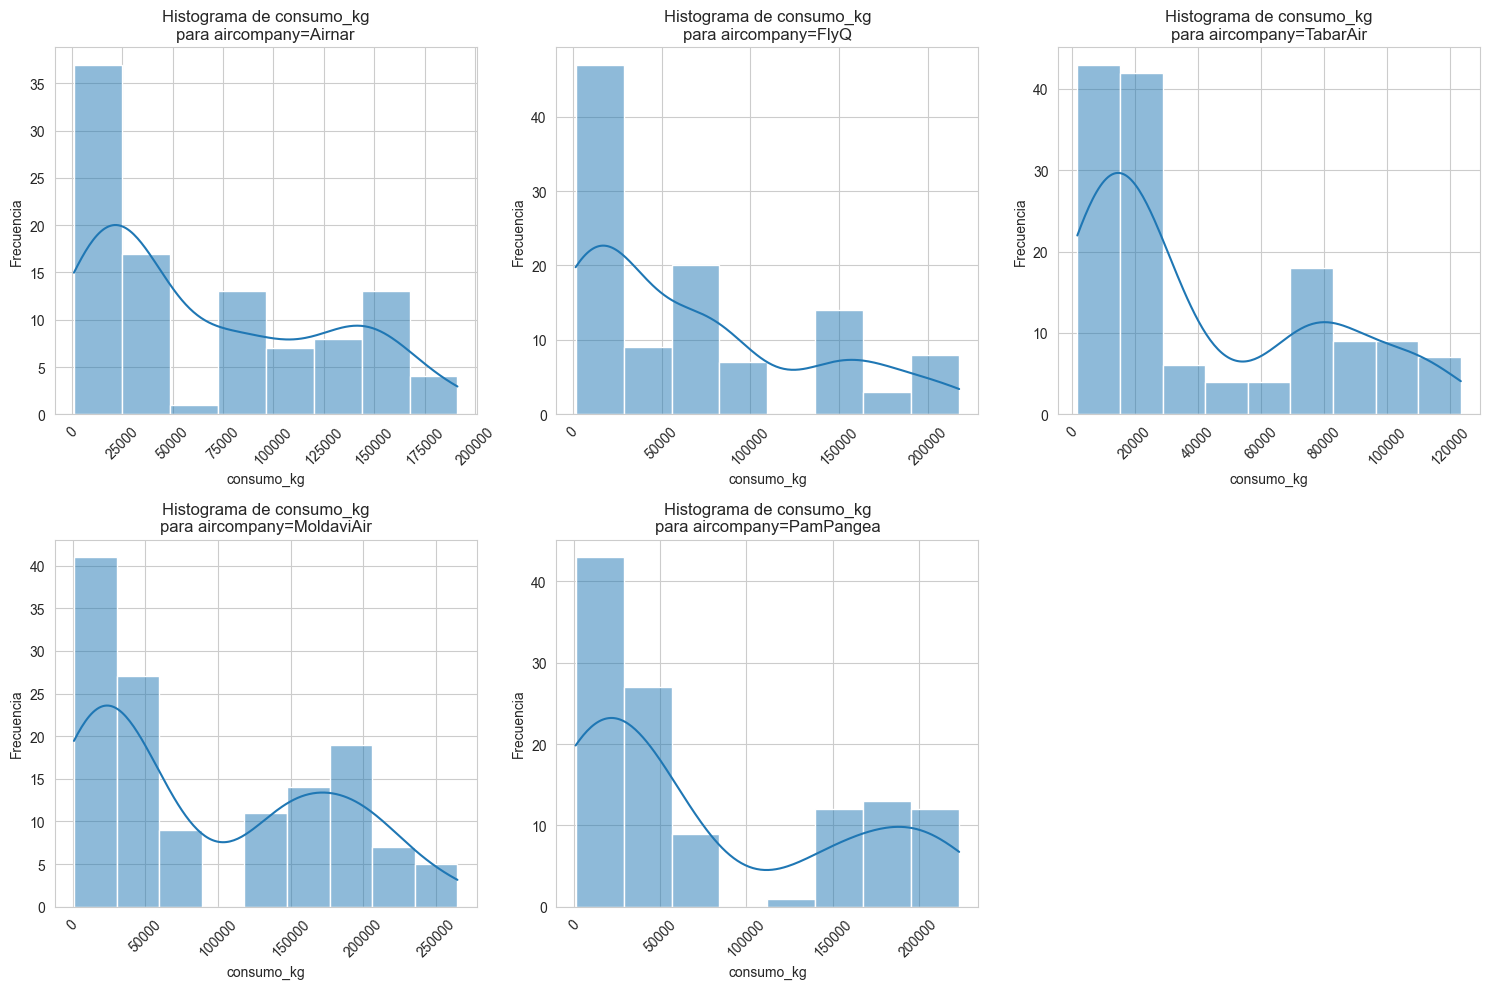


Estadísticas descriptivas por categoría:


,count,mean,std,min,25%,50%,75%,max
aircompany,,,,,,,,
Airnar,100.0,67317.617066,57214.103443,1028.6919,18089.328036,36984.898600,116693.5877,191296.341184
FlyQ,108.0,66544.261868,64477.166112,1635.8760,16977.167415,34444.876752,88048.5760,217389.157024
MoldaviAir,133.0,92661.437126,81278.236324,835.9200,18044.128960,52135.807464,158172.8212,264876.314560
PamPangea,117.0,76508.857060,77417.603137,877.7160,13660.633800,43402.688784,150304.8540,223496.416000
TabarAir,142.0,40494.809175,36834.413813,1713.1014,10525.238500,22981.961600,75663.6051,123479.527200


In [16]:
estadisticas2 = analizar_cat_num(df_viajes, 'aircompany', 'consumo_kg')
print("\nEstadísticas descriptivas por categoría:")
estadisticas2

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [17]:
def crear_scatter(df, col_num1, col_num2, col_cat=None, tamano_puntos=100):
    """
    Crea un diagrama de dispersión entre dos variables numéricas, con la opción
    de codificar una tercera variable categórica mediante colores.
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame que contiene los datos a visualizar
    col_num1 : str
        Nombre de la primera columna numérica (eje X)
    col_num2 : str
        Nombre de la segunda columna numérica (eje Y)
    col_cat : str, opcional
        Nombre de la columna categórica para el código de colores (default: None)
    tamano_puntos : int
        Tamaño de los puntos en el gráfico
        
    Retorna:
    --------
    matplotlib.axes.Axes
        El objeto axes conteniendo el gráfico
    """
    # Configurar el estilo de seaborn para una visualización más atractiva
    sns.set_style("whitegrid")
    
    # Crear una figura con un tamaño adecuado
    plt.figure(figsize=(10, 8))
    
    # Crear el diagrama de dispersión
    if col_cat is None:
        # Si no hay variable categórica, crear un scatter plot simple
        scatter = sns.scatterplot(
            data=df,
            x=col_num1,
            y=col_num2,
            s=tamano_puntos
        )
    else:
        # Si hay variable categórica, usarla para el código de colores
        scatter = sns.scatterplot(
            data=df,
            x=col_num1,
            y=col_num2,
            hue=col_cat,
            s=tamano_puntos
        )
        # Añadir una leyenda con el nombre de la variable categórica
        plt.legend(title=col_cat, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Configurar títulos y etiquetas
    plt.title(f'Diagrama de dispersión: {col_num2} vs {col_num1}')
    plt.xlabel(col_num1)
    plt.ylabel(col_num2)
    
    # Ajustar el diseño para evitar que la leyenda se corte
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()
    
    # Retornar el objeto axes para posibles modificaciones posteriores
    return scatter

### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

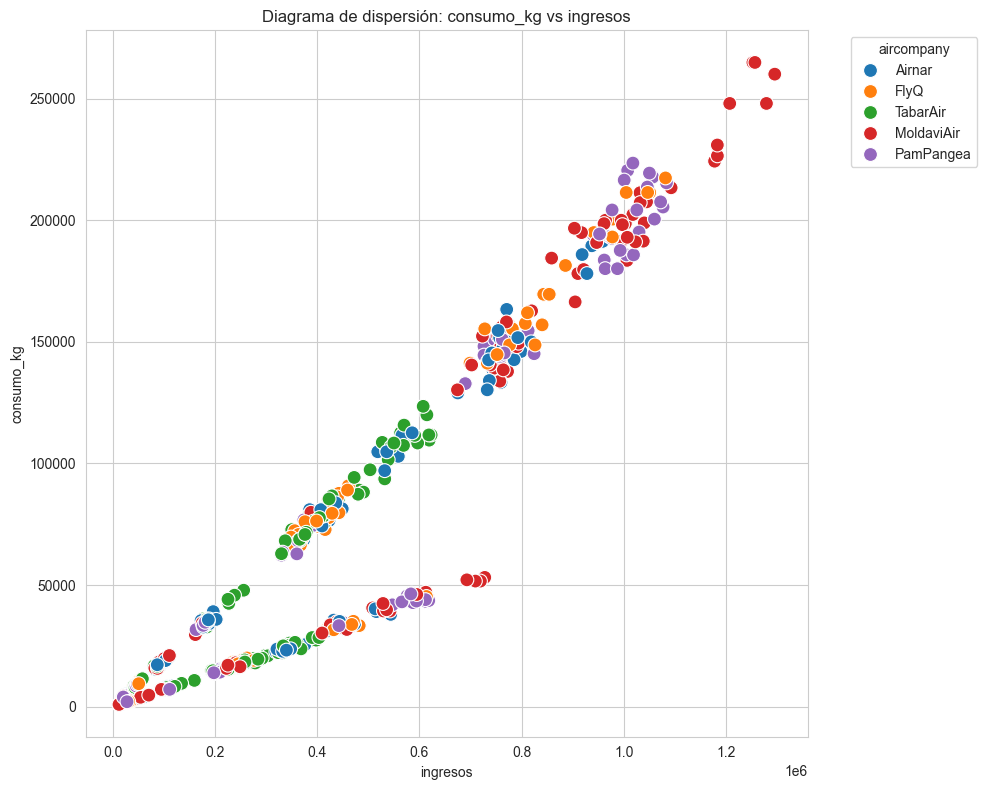

<Axes: title={'center': 'Diagrama de dispersión: consumo_kg vs ingresos'}, xlabel='ingresos', ylabel='consumo_kg'>

In [18]:

crear_scatter(df_viajes, 'ingresos', 'consumo_kg', col_cat='aircompany', tamano_puntos=100)

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

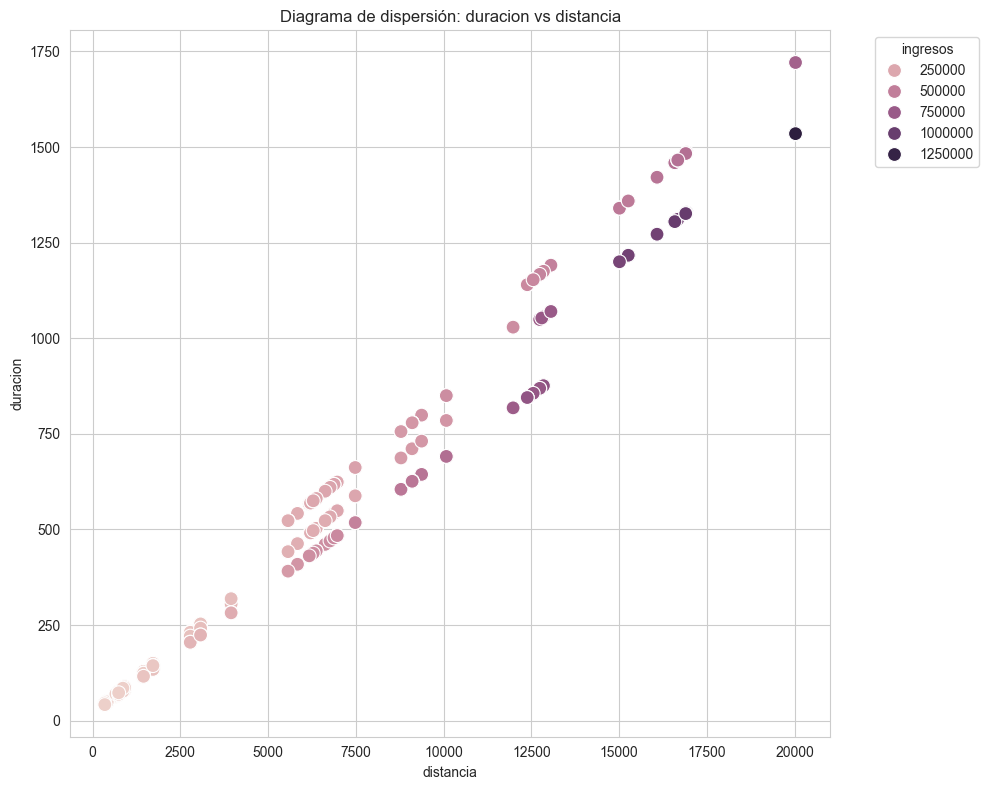

<Axes: title={'center': 'Diagrama de dispersión: duracion vs distancia'}, xlabel='distancia', ylabel='duracion'>

In [19]:

crear_scatter(df_viajes, 'distancia', 'duracion', 'ingresos', tamano_puntos=100)